Connecting Google drive with Google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Train and Test directory paths

In [2]:
train_path = '/content/drive/MyDrive/Malaria project/train'
test_path = '/content/drive/MyDrive/Malaria project/test'

Importing the necessary tools and libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
from keras.optimizers import adam
from keras.preprocessing.image import ImageDataGenerator

Declaring image size(standard size for all images in dataset)

In [4]:
IMAGE_SIZE = [224,224]

Downloading pre-trained models**(TRANSFER LEARNING)**

In [5]:
vgg16 = VGG16(include_top = False, weights = 'imagenet', input_shape = IMAGE_SIZE + [3])
vgg19 = VGG19(include_top = False, weights = 'imagenet', input_shape = IMAGE_SIZE + [3])
incp = InceptionV3(include_top = False, weights = 'imagenet', input_shape = IMAGE_SIZE + [3])

87910968/87910968 [==============================] - 5s 0us/step


In [6]:
for layer in vgg16.layers:
  layer.trainable = False


In [7]:
for layer in vgg19.layers:
  layer.trainable = False

In [8]:
for layer in incp.layers:
  layer.trainable = False

Adding the FC layers(fully connected layers) to the pre-trained models

In [9]:
model1 = Flatten()(vgg16.output)
model1 = Dense(2, activation = 'sigmoid')(model1)
model1 = Model(inputs = vgg16.input, outputs = model1)

In [10]:
model2 = Flatten()(vgg19.output)
model2 = Dense(2, activation = 'sigmoid')(model2)
model2 = Model(inputs = vgg19.input, outputs = model2)

In [11]:
model3 = Flatten()(incp.output)
model3 = Dense(2, activation = 'sigmoid')(model3)
model3 = Model(inputs = incp.input, outputs = model3)

Architecture of VGG16

In [12]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Architecture of VGG19

In [13]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Architecture of InceptionV3

In [14]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

Compilation of models

In [15]:
model1.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
model2.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
model3.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

**Data Augmentation**

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 10, shear_range = 0.1, vertical_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
train_data = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/Malaria project/train', batch_size = 32, class_mode = 'categorical', target_size = (224,224))

Found 7178 images belonging to 2 classes.


In [18]:
validation_data = test_datagen.flow_from_directory('/content/drive/MyDrive/Malaria project/test', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 820 images belonging to 2 classes.


Training of VGG16 with our image dataset

In [19]:
history1 = model1.fit(train_data, validation_data = validation_data, epochs = 20)

Epoch 1/20
225/225 [==============================] - 3783s 17s/step - loss: 0.3567 - accuracy: 0.8544 - val_loss: 0.3072 - val_accuracy: 0.8720
Epoch 2/20
225/225 [==============================] - 105s 465ms/step - loss: 0.2180 - accuracy: 0.9188 - val_loss: 0.2950 - val_accuracy: 0.9049
Epoch 3/20
225/225 [==============================] - 105s 466ms/step - loss: 0.1905 - accuracy: 0.9340 - val_loss: 0.3308 - val_accuracy: 0.8561
Epoch 4/20
225/225 [==============================] - 104s 461ms/step - loss: 0.1678 - accuracy: 0.9443 - val_loss: 0.2439 - val_accuracy: 0.9024
Epoch 5/20
225/225 [==============================] - 103s 459ms/step - loss: 0.1553 - accuracy: 0.9487 - val_loss: 0.2429 - val_accuracy: 0.9037
Epoch 6/20
225/225 [==============================] - 103s 458ms/step - loss: 0.1500 - accuracy: 0.9479 - val_loss: 0.2805 - val_accuracy: 0.8890
Epoch 7/20
225/225 [==============================] - 103s 458ms/step - loss: 0.1434 - accuracy: 0.9510 - val_loss: 0.2285 - 

Training of VGG19 with our image dataset

In [24]:
history2 = model2.fit(train_data, validation_data = validation_data, epochs = 20)

Epoch 1/20
225/225 [==============================] - 113s 494ms/step - loss: 0.4202 - accuracy: 0.8186 - val_loss: 0.5578 - val_accuracy: 0.7524
Epoch 2/20
225/225 [==============================] - 107s 475ms/step - loss: 0.2694 - accuracy: 0.8969 - val_loss: 0.6580 - val_accuracy: 0.7500
Epoch 3/20
225/225 [==============================] - 107s 474ms/step - loss: 0.2514 - accuracy: 0.9046 - val_loss: 0.2997 - val_accuracy: 0.8780
Epoch 4/20
225/225 [==============================] - 106s 471ms/step - loss: 0.1995 - accuracy: 0.9280 - val_loss: 0.3376 - val_accuracy: 0.8585
Epoch 5/20
225/225 [==============================] - 107s 476ms/step - loss: 0.1878 - accuracy: 0.9342 - val_loss: 0.2870 - val_accuracy: 0.8841
Epoch 6/20
225/225 [==============================] - 107s 474ms/step - loss: 0.1849 - accuracy: 0.9315 - val_loss: 0.3538 - val_accuracy: 0.8549
Epoch 7/20
225/225 [==============================] - 109s 483ms/step - loss: 0.1695 - accuracy: 0.9405 - val_loss: 0.3806 -

Training of InceptionV3 with our image dataset

In [30]:
history3 = model3.fit(train_data, validation_data = validation_data, epochs = 20)

Epoch 1/20
225/225 [==============================] - 114s 479ms/step - loss: 0.5090 - accuracy: 0.9048 - val_loss: 0.3734 - val_accuracy: 0.9195
Epoch 2/20
225/225 [==============================] - 103s 458ms/step - loss: 0.3520 - accuracy: 0.9381 - val_loss: 0.5271 - val_accuracy: 0.9256
Epoch 3/20
225/225 [==============================] - 105s 465ms/step - loss: 0.2812 - accuracy: 0.9455 - val_loss: 0.3576 - val_accuracy: 0.9390
Epoch 4/20
225/225 [==============================] - 102s 455ms/step - loss: 0.4150 - accuracy: 0.9369 - val_loss: 0.5515 - val_accuracy: 0.9341
Epoch 5/20
225/225 [==============================] - 104s 462ms/step - loss: 0.4174 - accuracy: 0.9436 - val_loss: 0.7085 - val_accuracy: 0.9146
Epoch 6/20
225/225 [==============================] - 102s 453ms/step - loss: 0.2418 - accuracy: 0.9600 - val_loss: 0.4805 - val_accuracy: 0.9354
Epoch 7/20
225/225 [==============================] - 104s 460ms/step - loss: 0.3066 - accuracy: 0.9551 - val_loss: 0.4631 -

Observation of final results through** matplotlib**

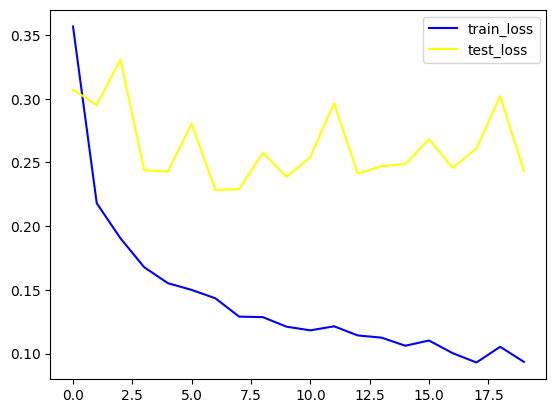

In [20]:
plt.plot(history1.history['loss'], label = 'train_loss', color = 'blue')
plt.plot(history1.history['val_loss'], label = 'test_loss', color = 'yellow')
plt.legend()
plt.show()

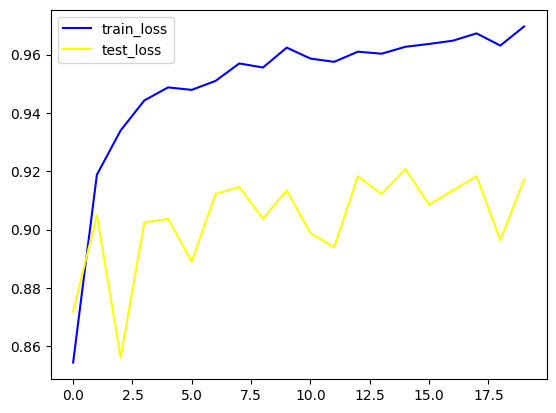

In [28]:
plt.plot(history1.history['accuracy'], label = 'train_loss', color = 'blue')
plt.plot(history1.history['val_accuracy'], label = 'test_loss', color = 'yellow')
plt.legend()
plt.show()

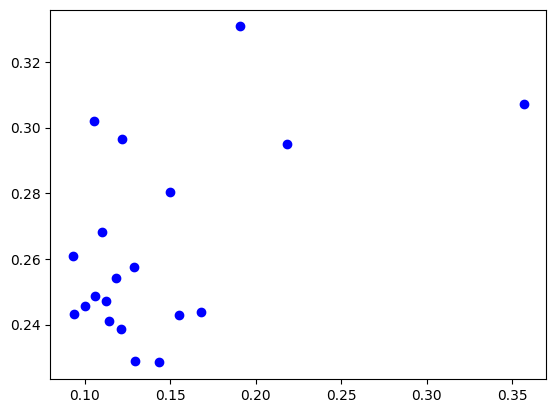

In [22]:
plt.scatter(history1.history['loss'],history1.history['val_loss'], color = 'blue')
plt.show()

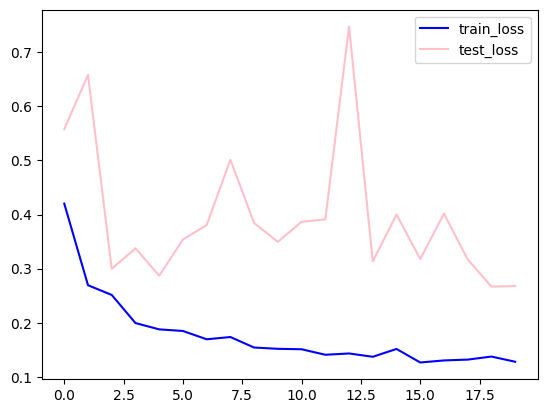

In [26]:
plt.plot(history2.history['loss'], label = 'train_loss', color = 'blue')
plt.plot(history2.history['val_loss'], label = 'test_loss', color = 'pink')
plt.legend()
plt.show()

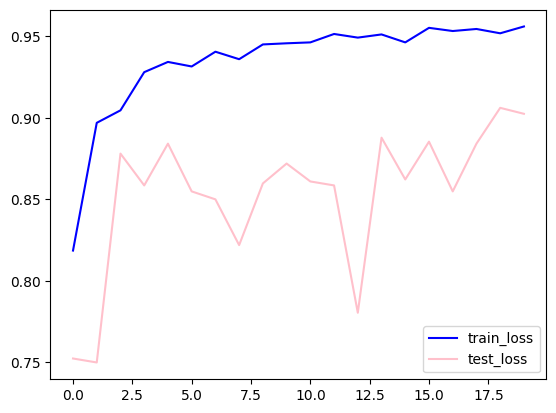

In [27]:
plt.plot(history2.history['accuracy'], label = 'train_loss', color = 'blue')
plt.plot(history2.history['val_accuracy'], label = 'test_loss', color = 'pink')
plt.legend()
plt.show()

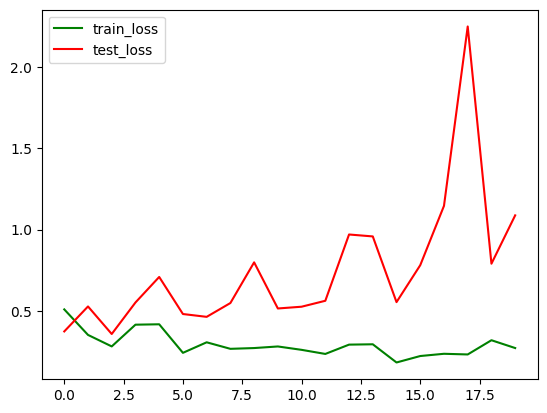

In [31]:
plt.plot(history3.history['loss'], label = 'train_loss', color = 'green')
plt.plot(history3.history['val_loss'], label = 'test_loss', color = 'red')
plt.legend()
plt.show()

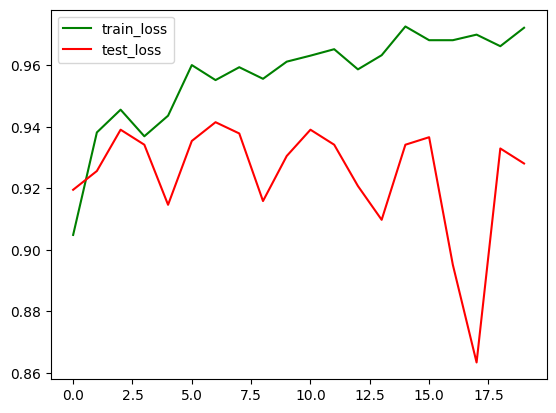

In [32]:
plt.plot(history3.history['accuracy'], label = 'train_loss', color = 'green')
plt.plot(history3.history['val_accuracy'], label = 'test_loss', color = 'red')
plt.legend()
plt.show()

Saving the models for future predictions using new data

In [23]:
from keras.models import load_model

final_model1 = model1.save('disease_pred_vgg16.h5')

In [29]:
final_model2 = model2.save('disease_pred_vgg19.h5')

In [33]:
final_model3 = model3.save('disease_pred_incp.h5')

Thank you